# 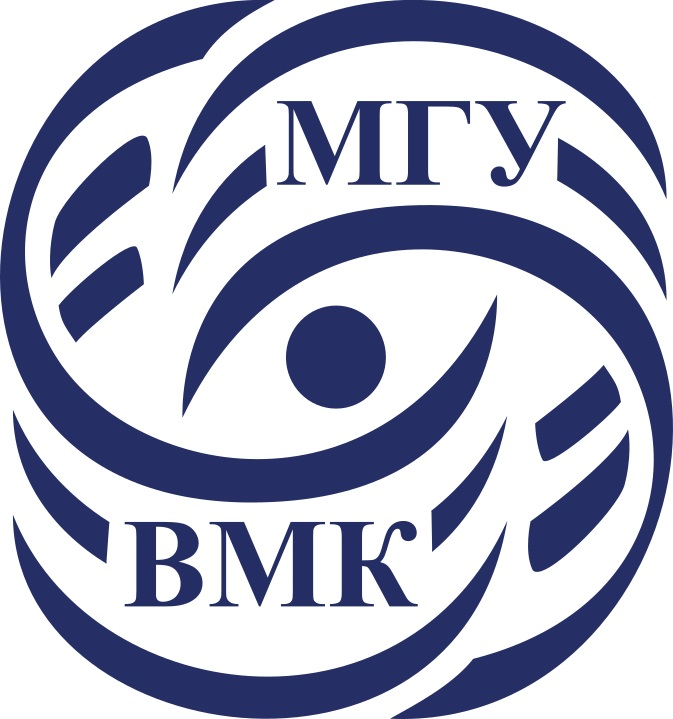

# Машинное обучение. ВМК МГУ


# Практическое задание 5: Линейные модели: регрессия

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2025"></font>







Цель данного задания:

* Узнать, что такое регуляризация, зачем она нужна, и чем отличаются разные регуляризаторы.
* Научиться решать задачу регрессии линейными моделями.
-------

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 5 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed  Time    Time    Time   Current
                                 Dload  Upload  Total   Spent   Left   Speed
100    360 100    360   0      0   1434      0                              0


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.8')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2025"></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что <font color='CornflowerBlue'>**линейная регрессия**</font> — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека `scikit-learn` (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

---
Напомним, что линейная регрессия &mdash; это модель вида

$a(x) = \langle w, x \rangle + b$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Для обучения параметров $w$ решается оптимизационная задача следующего вида:

$$\frac{1}{M} ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots + w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot R(w) \rightarrow \min_{w_1, \dots, w_n, b}$$

Здесь $R(w)$ &mdash; это регуляризация параметров модели, $\alpha$ &mdash; коэффициент регуляризации, задаваемый перед началом обучения.

Для обучения линейной регрессии, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- `LinearRegression` — линейная регрессия без регуляризации $R(w) = 0$ (метод наименьших квадратов)
- `Ridge` — линейная регрессия с оптимизацией MSE (Mean Square Error) и $\ell_2$-регуляризацией $R(w) = \frac{1}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right)$
- `Lasso` — линейная регрессия с оптимизацией MSE (Mean Square Error) и $\ell_1$-регуляризацией $R(w) = |w_1| + \dots + |w_n|$

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

---

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$.

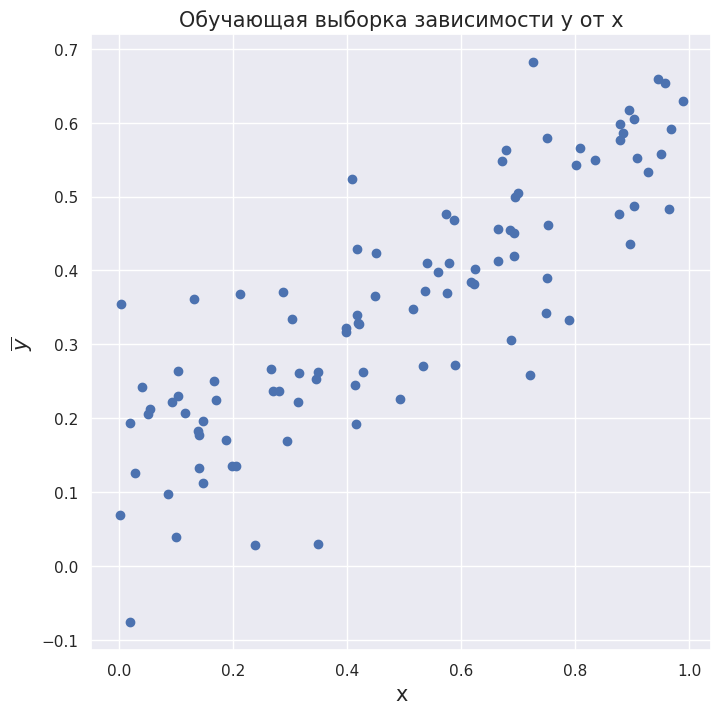

In [8]:
# Установка seed для воспроизводимости
np.random.seed(1)

# Генерация данных
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y) 
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

<font color='DarkSeaGreen'>**Обучим**</font> линейную регрессию с $l_2$ регуляризацией, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки `sklearn` (класс Ridge) коэффициент регуляризации задаётся параметром `alpha`

In [5]:
from sklearn.linear_model import Ridge

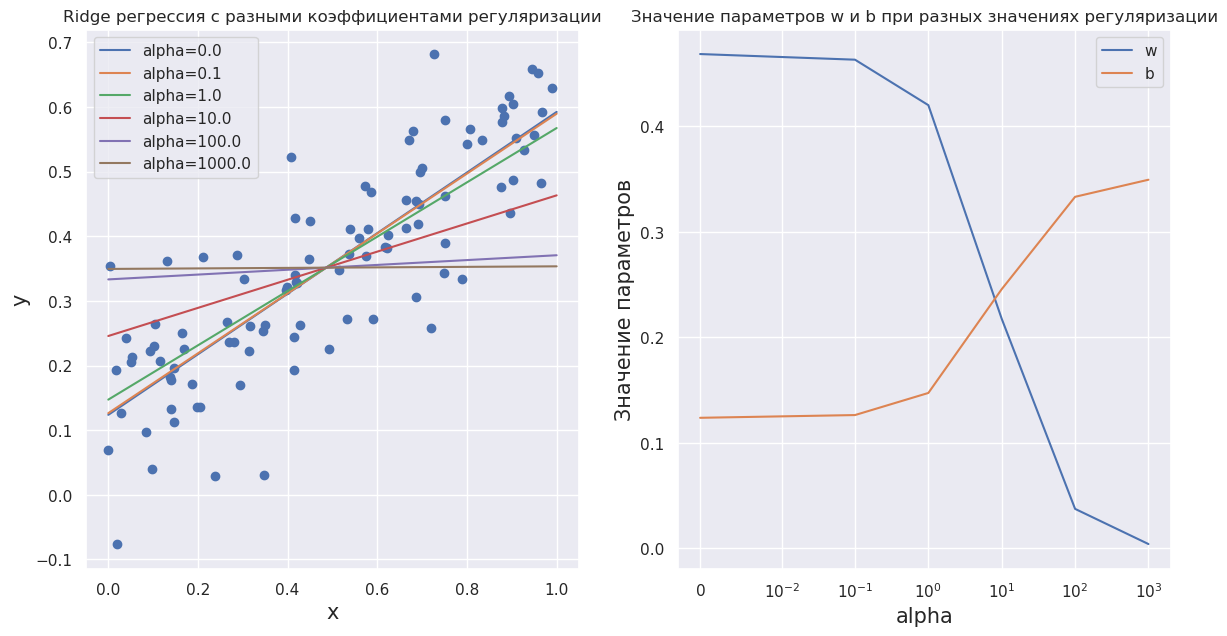

In [9]:
x_axis = np.linspace(0, 1, 200) # 200 равномерно распределенных точек от 0 до 1
fig, axs = plt.subplots(figsize=(14, 7), ncols=2) # 2 графика рядом
axs[0].scatter(X, Y) # Исходные данные на первом графике

w = [] # Будет хранить коэффициенты наклона (weights)
b = [] # Будет хранить свободные члены (intercepts)

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0] # Значения параметра регуляризации

for alpha in alphas:
    reg = Ridge(alpha=alpha) # Создание Ridge регрессора с заданным alpha
    reg.fit(X[:, None], Y) # Обучение модели (X преобразуется в 2D массив)
    pred = reg.predict(x_axis[:, None]) # Предсказание для гладкой оси X
    w.append(reg.coef_[0]) # Сохранение коэффициента w
    b.append(reg.intercept_) # Сохранение коэффициента b
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha)) # Линия регрессии

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 1 [2 баллa]**</font>

Как зависят параметры модели от константы регуляризации? А качество?



<font color='MediumOrchid'>**Ваши выводы тут:**</font>

https://stackoverflow.com/questions/59742169/what-is-the-parameter-alpha-in-ridge-regression
https://stackoverflow.com/questions/47283684/alpha-in-sklearn-logisticregression-python

+ Чем больше alpha (регуляризация), тем сильнее штраф -> веса уменьшаются, смещение растёт -> модель проще и недообучается.
+ Чем меньше alpha, тем веса крупнее, модель гибче -> растёт риск переобучения на шум.

Предельные случаи:
+ Большая alpha -> низкое качество на обучении, иногда лучше на тесте (меньше переобучение).
+ Очень маленькая alpha -> отличное качество на обучении, но плохое на тесте (переобучение).

---

Казалось бы, зачем нам <font color='CornflowerBlue'>**регуляризация**</font>?

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [10]:
np.random.seed(1) # Для воспроизводимости
X2 = np.hstack((X[:, None], 2 * X[:, None])) # Создание данных с идеальной корреляцией
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1 # Создание целевой переменной

reg = Ridge(alpha=0.0) # alpha=0 означает обычную линейную регрессию
reg.fit(X2, Y2) # Коэффициенты будут "прижаты" к нулю
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1]) 

w1: 0.10062207382659173 	w2: 0.20124414765318352


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [11]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None])) # Создание данных с идеальной корреляцией
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1 # Создание целевой переменной
 
reg = Ridge(alpha=0.0) # Обычная линейная регрессия (без регуляризации)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.32 	w2: -6814478528879.271


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими.

Создадим обучающую выборку из того же распределения и посмотрим на качество:

In [12]:
# Фиксация seed для воспроизводимости случайных чисел
np.random.seed(2)

# Создание тестового набора данных:
X3_test = np.random.uniform(0, 1, 100)          # 100 случайных чисел от 0 до 1
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))  # Создание 2D признаков
# Результат: X3_test.shape = (100, 2), где второй признак = 3 * первый признак

# Создание целевой переменной с шумом:
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1
# Формула: y = 0.5*x1 + 0.1 + шум
# где x1 - первый признак, шум ~ N(0, 0.1^2)

# Предсказание с помощью обученной модели линейной регрессии 'reg':
Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
# Эквивалентно: Y3_test_pred = reg.predict(X3_test)
# Формула: y_pred = w1*x1 + w2*x2 + b, где w = reg.coef_, b = reg.intercept_

# Вычисление MSE (среднеквадратичной ошибки):
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))
# MSE = среднее квадратов разностей между предсказаниями и истинными значениями

MSE loss: 0.0208


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [13]:
# Добавление ничтожно малого шума к одному элементу данных
X3_test[0, 1] = X3_test[0, 1] + 1e-10  # Добавляем 0.0000000001 ко второму признаку первого объекта

# Повторное предсказание с "зашумленными" данными
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)

# Вычисление MSE (должно быть почти идентично предыдущему)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))

# Сравнение предсказаний для первого объекта
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705812262879
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>
Рассмотрите больше примеров (хотя бы два) с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [14]:
def f1(x):
    return 7.0 * x

def f2(x):
    return 10.0 * x

def f3(x):
    # Для линейно независимых уже нет взрыва
    return 10.0 * x + 1

examples_parameters = [
    (f1, 46, 79),
    (f2, 82, 79),
    (f3, 99, 99)
]

# Used the following code to find the parameters:
'''
import numpy as np
from sklearn.linear_model import Ridge

import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)

# "Fuzzing" parameters

def f1(x):
    return 7.0 * x

def f2(x):
    return 10.0 * x

def f3(x):
    return 10.0 * x + 0.0000000001

def f(x):
    return f2(x)

SEED_MAX_X = 200
SEED_MAX_Y = 200

# Epic case criterea

MSE_CLEAN_MAX = 0.1
DELTA_MIN = 1e5

def run_trial(x_seed, y_seed):
    # === Train ===
    np.random.seed(x_seed)
    x1 = np.random.uniform(0, 1, 100)
    X = np.hstack((x1[:, None], f(x1[:, None])))

    np.random.seed(y_seed)
    y = X[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

    reg = Ridge(alpha=0.0).fit(X, y)

    # test
    np.random.seed(2)
    x1_t = np.random.uniform(0, 1, 100)
    X_t = np.hstack((x1_t[:, None], f(x1_t[:, None])))

    np.random.seed(5)
    y_t = X_t[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

    pred_clean = np.sum(reg.coef_[None] * X_t + reg.intercept_, axis=1)
    mse_clean = np.mean((pred_clean - y_t) ** 2)

    # NOISY test
    X_t_noisy = X_t.copy()
    X_t_noisy[0, 1] += 1e-10

    pred_noisy = np.sum(reg.coef_[None] * X_t_noisy + reg.intercept_, axis=1)
    mse_noisy = np.mean((pred_noisy - y_t) ** 2)

    delta = mse_noisy - mse_clean
    w1, w2 = reg.coef_
    return {
        "x_seed": x_seed, "y_seed": y_seed,
        "w1": w1, "w2": w2, "intercept": reg.intercept_,
        "mse_clean": mse_clean, "mse_noisy": mse_noisy, "delta": delta
    }

def main():
    best = []

    for sx in range(SEED_MAX_X):
        for sy in range(SEED_MAX_Y):
            res = run_trial(sx, sy)

            best.append(res)
            best.sort(key=lambda r: r["delta"], reverse=True)
            best = best[:5]

            if (res["mse_clean"] <= MSE_CLEAN_MAX) and (res["delta"] >= DELTA_MIN):
                print("\n=== EPIC SEADS FOUND ===")
                print(f"seeds: x_seed={res['x_seed']}, y_seed={res['y_seed']}")
                print(f"coefs: w1={res['w1']:.3e}, w2={res['w2']:.3e}, intercept={res['intercept']:.3e}")
                print(f"MSE clean = {res['mse_clean']:.6f}")
                print(f"MSE noisy = {res['mse_noisy']:.6f}")
                print(f"Delta MSE = {res['delta']:.6f}")
                return

        if (sx + 1) % 20 == 0:
            print(f"Checked x_seed={sx+1}/{SEED_MAX_X}... Current best Delta MSE = {best[0]['delta']:.3f}")

    print("\n=== TOP 5 best Delta MSE ===")
    for i, r in enumerate(best, 1):
        print(f"[{i}] seeds (x={r['x_seed']}, y={r['y_seed']}) | "
              f"Delta MSE={r['delta']:.3e} | clean={r['mse_clean']:.3e} | w2={r['w2']:.3e}")

if __name__ == "__main__":
    main()
'''

for i, (f, x_seed, y_seed) in enumerate(examples_parameters, start=1):
    print("Example #", i)
    np.random.seed(x_seed) # for the sake of consistent testing
    X = np.random.uniform(0, 1, 100)
    X5 = np.hstack((X[:, None], f(X[:, None])))

    np.random.seed(y_seed) # for the sake of consistent testing
    Y5 = X5[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

    reg = Ridge(alpha=0.0)
    reg.fit(X5, Y5)
    print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

    np.random.seed(2) # for the sake of consistent testing
    X5_test = np.random.uniform(0, 1, 100)
    X5_test = np.hstack((X5_test[:, None], f(X5_test[:, None])))
    np.random.seed(5) # for the sake of consistent testing
    Y5_test = X5_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

    Y5_test_pred = np.sum(reg.coef_[None] * X5_test + reg.intercept_, axis=1)
    print("MSE loss: %.4f" % np.mean((Y5_test_pred - Y5_test) ** 2))
    print("Предсказание для объекта без шума: ", Y5_test_pred[0])

    X5_test_noisy = X5_test.copy()
    X5_test_noisy[0, 1] += 1e-10
    Y5_test_pred_noisy = np.sum(reg.coef_[None] * X5_test_noisy + reg.intercept_, axis=1)
    print("MSE noisy loss:", np.mean((Y5_test_pred_noisy - Y5_test) ** 2))
    print("Предсказание для объекта с шумом: ", Y5_test_pred_noisy[0])
    print()

Example # 1
w1: 354766830630015.7 	w2: -50680975804287.88
MSE loss: 0.0299
Предсказание для объекта без шума:  0.46875
MSE noisy loss: 256844.96424763236
Предсказание для объекта с шумом:  -5067.625

Example # 2
w1: -329589170948197.7 	w2: 32958917094819.812
MSE loss: 0.0571
Предсказание для объекта без шума:  0.5625
MSE noisy loss: 108643.24583529291
Предсказание для объекта с шумом:  3296.46875

Example # 3
w1: 2.4211644735619426 	w2: -0.18749999999999997
MSE loss: 0.0798
Предсказание для объекта без шума:  0.5918720895443479
MSE noisy loss: 0.0797576376646655
Предсказание для объекта с шумом:  0.591872089525598



-------------

## Масштабирование данных

Попробуем обучить линейную регрессию уже c $l_1$ регуляризацией (Lasso) на специальном датасете из sklearn

In [15]:
# Импорт необходимых модулей
from sklearn.datasets import fetch_california_housing  # Датсет цен на жилье в Калифорнии
from sklearn.model_selection import train_test_split   # Функция для разделения данных

# Загрузка датасета California Housing
X, y = fetch_california_housing(return_X_y=True)
# X - признаки (features), y - целевая переменная (цена домов)
# return_X_y=True возвращает данные в формате (features, target)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Матрица признаков
    y,                    # Вектор целевых значений
    test_size=0.3,        # Размер тестовой выборки: 30%
    random_state=2024     # Seed для воспроизводимости
)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [16]:
# Временная установка параметров форматирования для numpy
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
    # Вычисление средних значений по каждому столбцу (признаку)
    print(X_train.mean(axis=0))

[ 3.868  28.712  5.411  1.093  1416.185  3.109  35.637 -119.583]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [17]:
from sklearn.preprocessing import StandardScaler

### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

Отмасштабируйте данные при помощи класса `StandardScaler`. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

<font color='OrangeRed'>**Примечание**</font> Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [18]:
# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование обучающих данных (с вычислением параметров)
X_train_scaled = scaler.fit_transform(X_train)
# 1. fit_transform вычисляет mean и std на X_train
# 2. transform применяет: (X - mean) / std

# Масштабирование тестовых данных (используя параметры с обучающих)
X_test_scaled = scaler.transform(X_test)
# Применяет те же mean и std, что были вычислены на X_train
# Важно: НЕ пересчитывать параметры на тестовых данных!

# Проверка средних значений после масштабирования
print("Mean of features on the TRAIN set:")
print(X_train_scaled.mean(axis=0))
# Ожидается: ~ [0, 0, 0, ...] (но может быть не точно 0 из-за численных погрешностей)

print("Mean of features on the TEST set:")
print(X_test_scaled.mean(axis=0))
# Ожидается: значения близкие к 0, но не точно 0
# (так как используются параметры с обучающей выборки)

# Проверка стандартных отклонений после масштабирования
print("Standard deviation of features on the TRAIN set:")
print(X_train_scaled.std(axis=0))
# Ожидается: ~ [1, 1, 1, ...] (но может быть не точно 1)

print("Standard deviation of features on the TEST set:")
print(X_test_scaled.std(axis=0))
# Ожидается: значения близкие к 1

Mean of features on the TRAIN set:
[-1.28852282e-14 -1.22033858e-16  1.04043335e-14  8.87589613e-16
 -2.77402071e-18 -3.88660064e-16 -1.65554247e-14 -1.03492488e-13]
Mean of features on the TEST set:
[ 0.00436495 -0.0191476   0.02825504  0.03345443  0.02792386 -0.01057184
 -0.00821216  0.02163926]
Standard deviation of features on the TRAIN set:
[1. 1. 1. 1. 1. 1. 1. 1.]
Standard deviation of features on the TEST set:
[1.03884777 1.00878023 1.447561   1.66340205 1.06819027 0.26416158
 0.99299846 0.99474519]


Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [19]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import Lasso

In [20]:
# Создание модели Lasso регрессии с параметром регуляризации alpha=0.5
reg = Lasso(alpha=0.5)

# Обучение модели на масштабированных обучающих данных
reg.fit(X_train_scaled, y_train)

# Прогнозирование на масштабированных тестовых данных
y_pred = reg.predict(X_test_scaled)

# Оценка качества модели с помощью RMSE (Root Mean Squared Error)
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.9798


### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

В чем плюсы RMSE по сравнению с MSE?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

https://www.reddit.com/r/learnmachinelearning/comments/s98fsr/comment/htm227n/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button

Та же единица измерения у RMSE, как следствие:

+ Ошибку проще проинтерпретировать (ЕИ совпадают) -> проще объяснить бизнесу / себе
+ Сохраняет усиленное наказание за большие ошибки (как и MSE). Если RMSE сильно отличается, то MSE отличается ЕЩЁ СИЛЬНЕЕ.

---

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [21]:
reg.coef_

array([ 0.28811554,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [22]:
# Создание модели Ridge регрессии с параметром регуляризации alpha=0.5
reg = Ridge(alpha=0.5)

# Обучение модели на стандартизированных обучающих данных
reg.fit(X_train_scaled, y_train)

# Вывод коэффициентов обученной модели
print(reg.coef_)

[ 8.50854581e-01  1.25545440e-01 -2.78892640e-01  3.08812622e-01
 -1.99686054e-04 -4.12942247e-02 -8.88296917e-01 -8.60046905e-01]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

---

## Подбор гиперпараметра при регуляризации

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью <font color='CornflowerBlue'>**кросс-валидации**</font>. В sklearn есть несколько классов со встроенной кросс-валидацией

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### <font color='DarkOrange'>**Задание 5 [3 баллa]**</font>

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


<font color='LightSteelBlue'>**Подсказка**</font>

* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

<font color='OrangeRed'>**Примечание**</font> Итоговое качество должно быть не больше 0.75 RMSE. За меньшее качество балл будет снижаться

In [25]:
# Создание пайплайна для Lasso регрессии
model_lasso = Pipeline([
    ("scaler", StandardScaler()),  # Шаг 1: стандартизация данных
    ("regr", Lasso())               # Шаг 2: Lasso регрессия
])

# Создание пайплайна для Ridge регрессии
model_ridge = Pipeline([
    ("scaler", StandardScaler()),  # Шаг 1: стандартизация данных
    ("regr", Ridge())               # Шаг 2: Ridge регрессия
])

# Настройка GridSearchCV для Lasso
lasso_cv = GridSearchCV(
    model_lasso,                     # Модель для настройки
    cv=5,                           # 5-кратная кросс-валидация
    scoring="neg_root_mean_squared_error",  # Метрика: отрицательный RMSE
    param_grid = {'regr__alpha' : np.logspace(-10, 1, 100)}  # Сетка параметров
)

# Настройка GridSearchCV для Ridge
ridge_cv = GridSearchCV(
    model_ridge,                    # Модель для настройки
    cv=5,                           # 5-кратная кросс-валидация
    scoring="neg_root_mean_squared_error",  # Метрика: отрицательный RMSE
    param_grid = {'regr__alpha' : np.logspace(-10, 1, 100)}  # Сетка параметров
)

# Обучение и оценка Lasso модели
lasso_cv.fit(X_train, y_train) 
y_pred_lasso = lasso_cv.predict(X_test)
print('Best RMSE for Lasso: %.2f' % root_mean_squared_error(y_test, y_pred_lasso))

# Обучение и оценка Ridge модели
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
print('Best RMSE for Ridge: %.2f' % root_mean_squared_error(y_test, y_pred_ridge))

Best RMSE for Lasso: 0.73
Best RMSE for Ridge: 0.73


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [26]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.84798312,  0.12581644, -0.27248294,  0.30233023, -0.        ,
       -0.04068825, -0.88191944, -0.85328579])

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Кaк подбирать параметры линейной модели.

-----
<font color="white" style="opacity:0.2025"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
